In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [ ]:
df = pd.read_csv('/content/New York City Airbnb.csv')



Data Inspection

In [ ]:
print(df.head())
print(df.tail())
df.info()
print(df.isnull().sum())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

Analyze reviews_per_month Column


In [ ]:
unique_reviews_df = pd.DataFrame(df['reviews_per_month'].unique(), columns=['unique_reviews_per_month'])
print(unique_reviews_df)


     unique_reviews_per_month
0                        0.21
1                        0.38
2                         NaN
3                        4.64
4                        0.10
..                        ...
933                      7.86
934                     11.71
935                      9.73
936                     10.91
937                     10.54

[938 rows x 1 columns]


Handle Missing Values

In [ ]:
median_value = df['reviews_per_month'].median()
df['reviews_per_month'] = df['reviews_per_month'].fillna(median_value)


Drop Irrelevant Columns

In [ ]:
df.drop(columns=['name', 'host_id', 'host_name', 'last_review'], inplace=True)


Duplicate Check

In [ ]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


Dataset Overview

In [ ]:
print("Dataset Shape:", df.shape)
print(df.describe().T)
print("Columns:", df.columns.tolist())
print(df.nunique())


Dataset Shape: (48895, 12)
                                  count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               48895.0  1.238930e+00  1.520861e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.244

Separate Variable Types

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

print("Categorical Variables:")
print(cat_cols)
print("----------------------------------")
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')
----------------------------------
Numerical Variables:
['id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Data Types and Standard Deviation

In [ ]:
print(df.dtypes)
std_values = df[num_cols].std()
print("Standard Deviations:")
print(std_values)


id                                  int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
Standard Deviations:
id                                1.098311e+07
latitude                          5.453008e-02
longitude                         4.615674e-02
price                             2.401542e+02
minimum_nights                    2.051055e+01
number_of_reviews                 4.455058e+01
reviews_per_month                 1.520861e+00
calculated_host_listings_count    3.295252e+01
availability_365                  1.316223e+02
dtype: float64


Range of Numeric Columns

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    print(f'{col}: Min = {df[col].min()}, Max = {df[col].max()}')


id: Min = 2539, Max = 36487245
latitude: Min = 40.49979, Max = 40.91306
longitude: Min = -74.24442, Max = -73.71299
price: Min = 0, Max = 10000
minimum_nights: Min = 1, Max = 1250
number_of_reviews: Min = 0, Max = 629
reviews_per_month: Min = 0.01, Max = 58.5
calculated_host_listings_count: Min = 1, Max = 327
availability_365: Min = 0, Max = 365


Outlier Detection & Removal

In [ ]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (45923, 12)


**Data Visualization**

Price Distribution

count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64


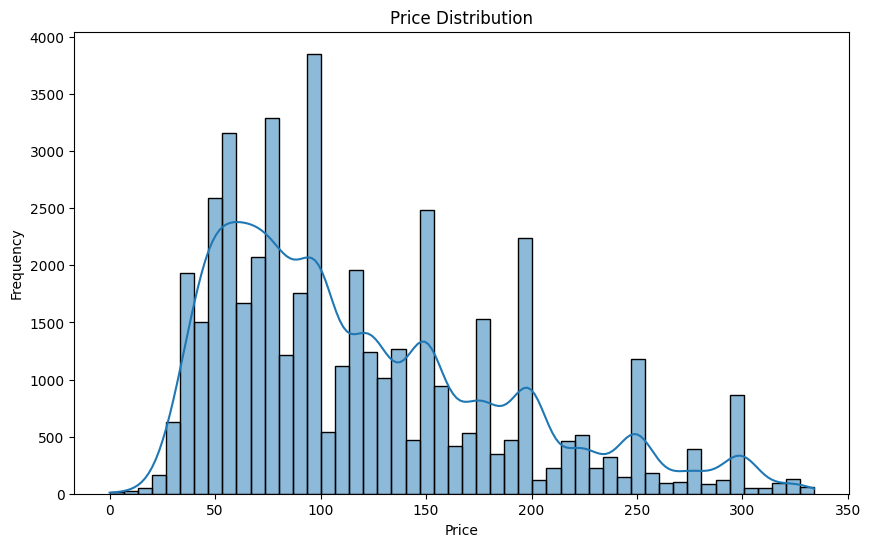

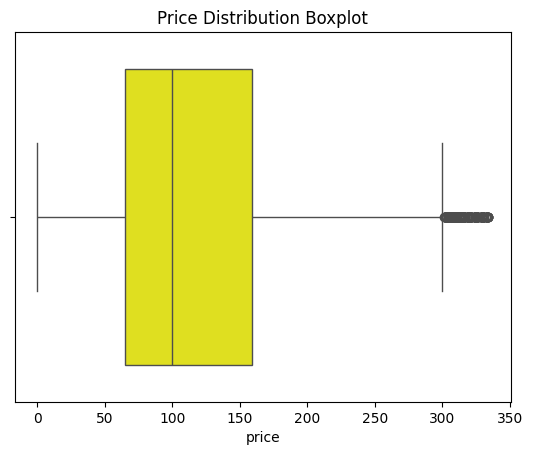

In [ ]:
print(df['price'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x=df['price'], color='yellow')
plt.title("Price Distribution Boxplot")
plt.show()


Numeric Feature Distributions

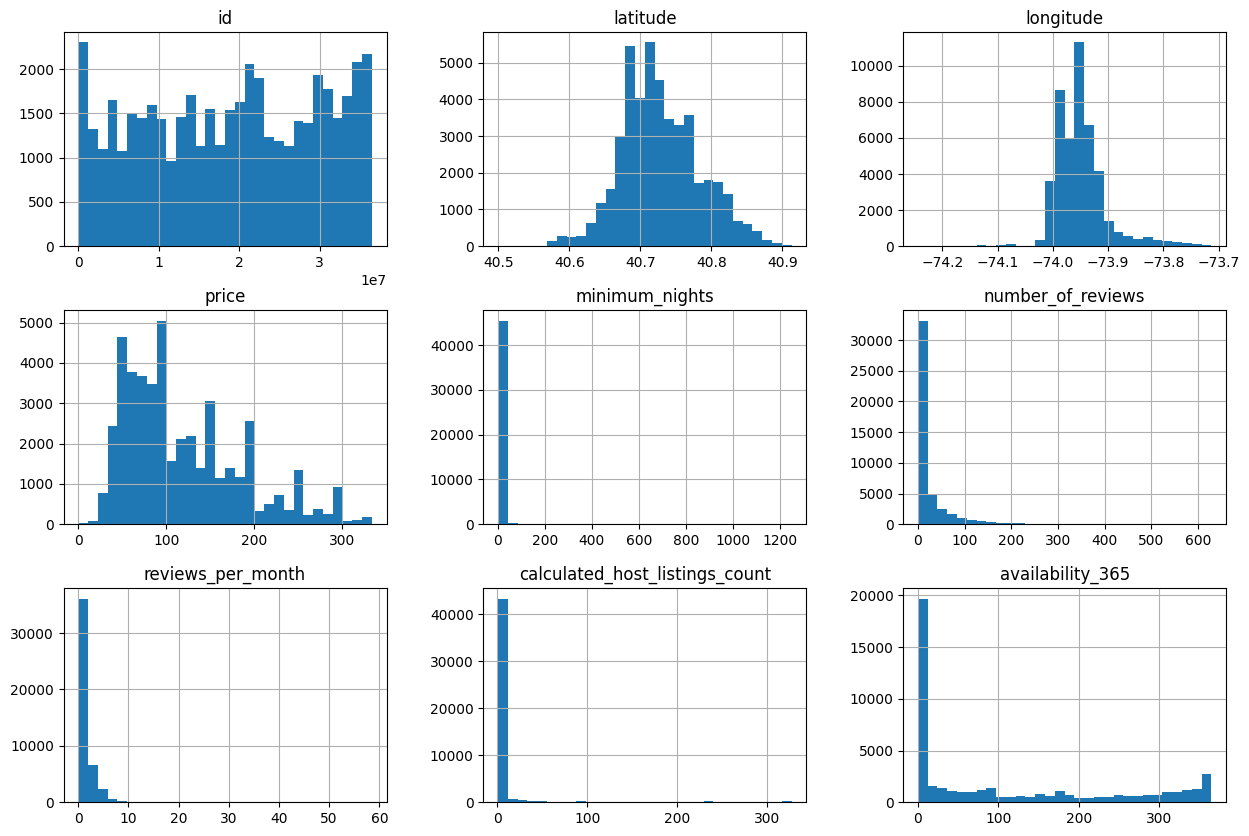

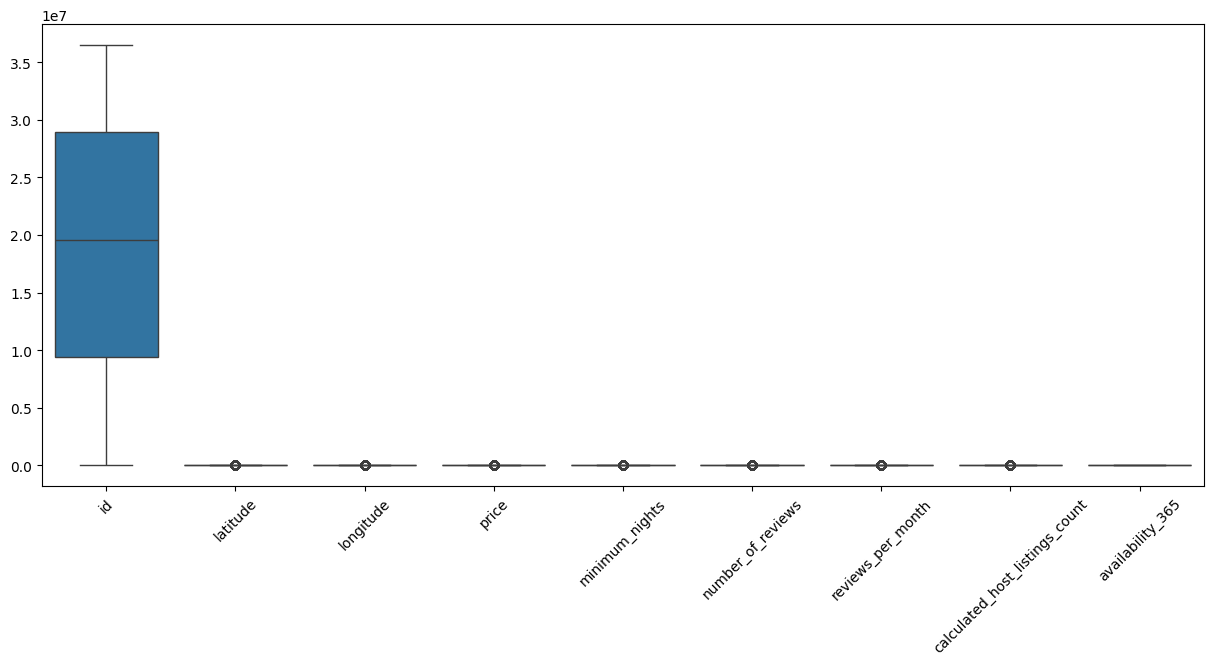

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.show()


Histogram for Each Numeric Column

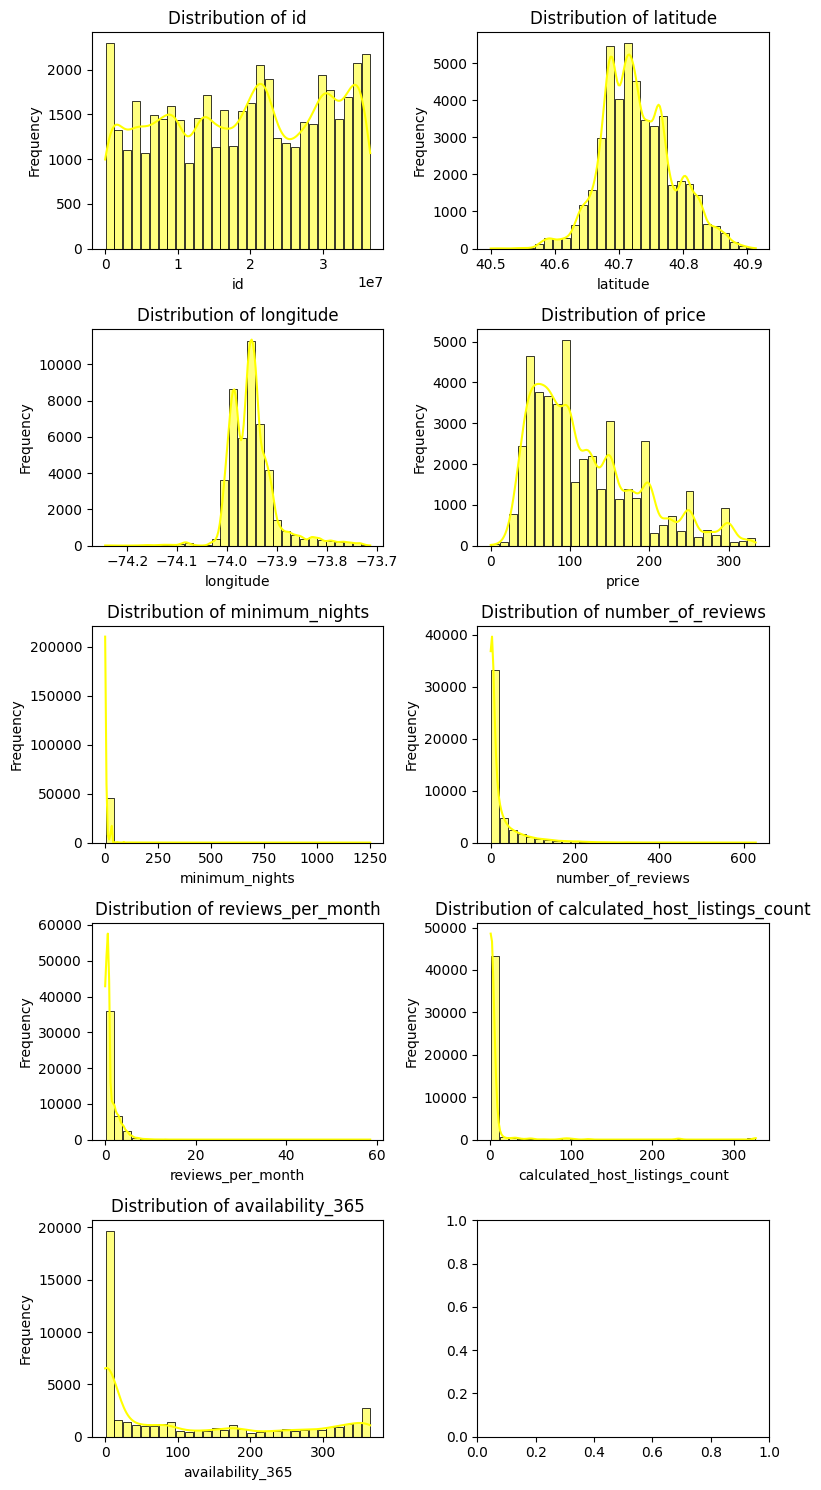

In [ ]:
col_with_no_std = df.select_dtypes(include=np.number).columns.tolist()
num_cols = len(col_with_no_std)

fig, axes = plt.subplots(nrows=(num_cols // 2) + (num_cols % 2), ncols=2, figsize=(8, (num_cols // 2 + 1) * 3))
axes = axes.flatten()

for i, col in enumerate(col_with_no_std):
    sns.histplot(df[col], kde=True, ax=axes[i], color='yellow', bins=30, shrink=0.9)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Correlation Heatmap

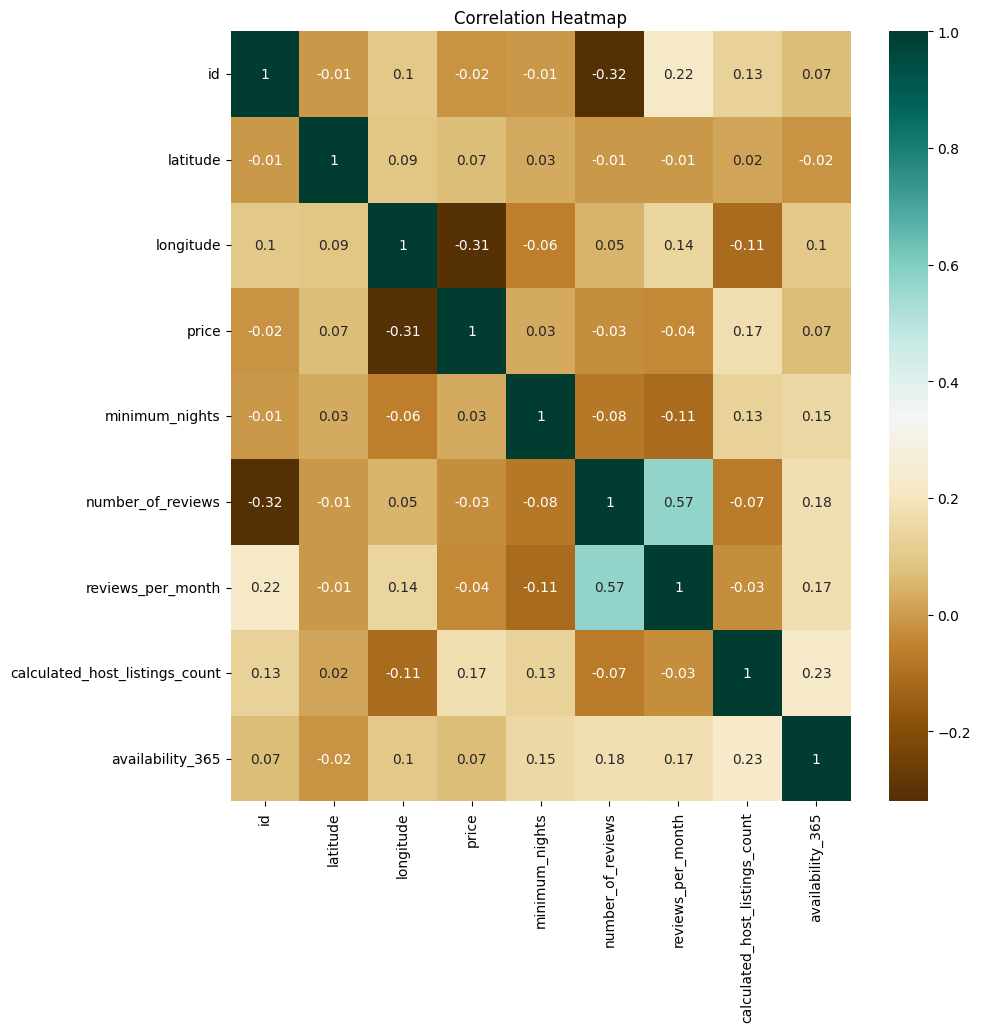

In [ ]:
correlation_matrix = df[col_with_no_std].corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="BrBG", annot=True)
plt.title("Correlation Heatmap")
plt.show()



Neighbourhood Group Distribution

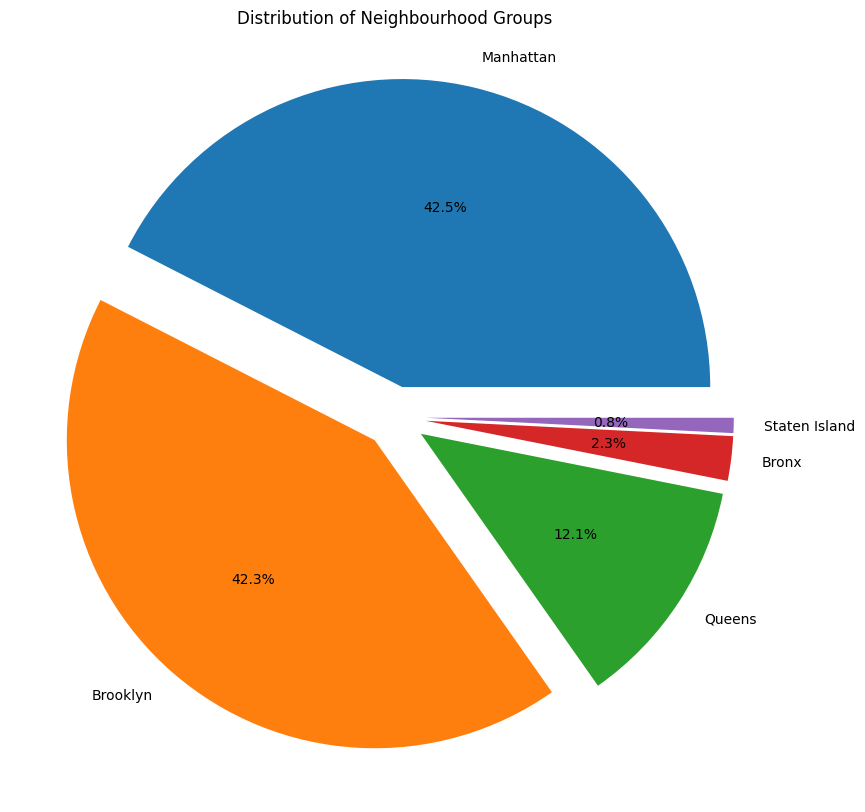

In [ ]:
data = df['neighbourhood_group'].value_counts()
explode = (0.1,) * len(data)

plt.figure(figsize=(10, 10))
data.plot(kind='pie', autopct="%0.1f%%", explode=explode)
plt.title('Distribution of Neighbourhood Groups')
plt.ylabel('')
plt.show()


Neighbourhood Group vs Price

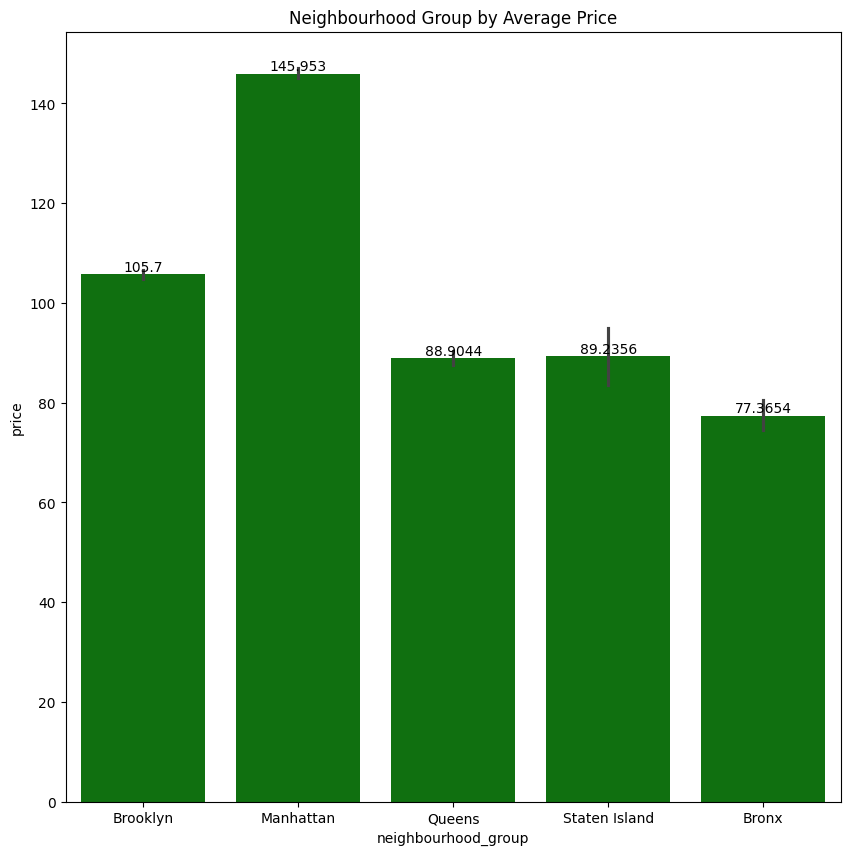

In [ ]:
plt.figure(figsize=(10,10))
y = sns.barplot(data=df, x='neighbourhood_group', y='price', color='green')
y.bar_label(y.containers[0])
plt.title('Neighbourhood Group by Average Price')
plt.show()


Room Type Distribution

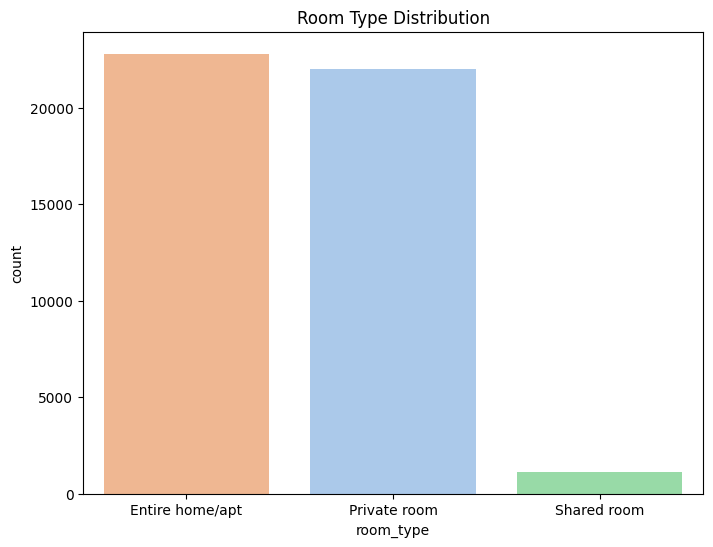

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(
    x='room_type',
    data=df,
    palette='pastel',
    order=df['room_type'].value_counts().index,
    hue='room_type'
)
plt.title("Room Type Distribution")
plt.show()


Geographic Price Distribution

In [ ]:


import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.7128, -74.0060], zoom_start=11, tiles='cartodbpositron')

marker_cluster = MarkerCluster().add_to(m)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        popup=f"Neighbourhood: {row['neighbourhood_group']}<br>Room: {row['room_type']}<br>Price: ${row['price']}",
        color='blue',
        fill=True,
        fill_color='red' if row['price'] > df['price'].median() else 'green',
        fill_opacity=0.6
    ).add_to(marker_cluster)
m



Buffered data was truncated after reaching the output size limit.